In [77]:
import warnings 
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from mpl_toolkits import mplot3d
import pickle # convert model into bytestream

pd.options.mode.chained_assignment = None 

In [78]:
data = pd.read_csv('D:\This Project\Credit Spend\CreditCards.csv')

In [79]:
''' 
given ->> amount of transaction at one go for a person 

Aim ->  to predict transaction for a person in particular month , gender , card type 

    -> cluster customers based on card type , amount and gender and give reminder of saving and amount to
 save to customers spending more frequently 

 
NEW AIMS - Include YOur Knowledge about Quants( how Credits , Equities work in market ) 
      -  Also uae a RNN to analyze transctino amnt of indiviudla users and do future prediction basedon prev transaction (RNN)
'''

' \ngiven ->> amount of transaction at one go for a person \n\nAim ->  to predict transaction for a person in particular month , gender , card type \n\n    -> cluster customers based on card type , amount and gender and give reminder of saving and amount to\n save to customers spending more frequently \n\n \nNEW AIMS - Include YOur Knowledge about Quants( how Credits , Equities work in market ) \n      -  Also uae a RNN to analyze transctino amnt of indiviudla users and do future prediction basedon prev transaction (RNN)\n'

In [80]:
data.info()

''' 2 rows are empty '''

data.dropna( inplace = True )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26054 entries, 0 to 26053
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      26052 non-null  float64
 1   City       26052 non-null  object 
 2   Date       26054 non-null  object 
 3   Card Type  26052 non-null  object 
 4   Exp Type   26052 non-null  object 
 5   Gender     26052 non-null  object 
 6   Amount     26052 non-null  float64
 7   Year       26052 non-null  float64
 8   Month      26052 non-null  object 
dtypes: float64(3), object(6)
memory usage: 1.8+ MB


In [81]:
data.describe() 
'''  Numericla attributes only'''

'  Numericla attributes only'

In [82]:
''' Removing 'India' name from City  and adding a new field of cities '''


def extract_city ( col ) :
    cities = []
    rows = len(col) 
    for i in range(rows ) :

        st = data.loc[i]['City']
        city = st.split(',')[0]
        cities.append(city )
    
    return cities 

cities = extract_city( data['City'])

data.drop( 'City' , axis=1 , inplace= True )

In [83]:
'''  Adding this new field of only cities ''' 

data['Cities'] = cities 


In [84]:
''' Dropping the Date & Index Column since Month ( festivities) are already given '''

data = data.drop( ['Date' , 'index' ] , axis = 1 )


In [85]:
data.head()

,Card Type,Exp Type,Gender,Amount,Year,Month,Cities
0,Gold,Bills,F,82475.0,2014.0,October,Delhi
1,Platinum,Bills,F,32555.0,2014.0,August,Greater Mumbai
2,Silver,Bills,F,101738.0,2014.0,August,Bengaluru
3,Signature,Bills,F,123424.0,2014.0,April,Greater Mumbai
4,Gold,Bills,F,171574.0,2015.0,May,Bengaluru


In [86]:
''' Some inferences from the RAW dataset '''

'''  Average amount of transactions per month FOr all population  '''

avg_trans_month = len( data['Amount']) / 12 

print( f" Per month , there have been , Average {avg_trans_month} transactions " )



 Per month , there have been , Average 2171.0 transactions 


In [146]:
data.head()

,"(Achalpur,)","(Adilabad,)","(Adityapur,)","(Adoni,)","(Adoor,)","(Afzalpur,)","(Agartala,)","(Agra,)","(Ahmedabad,)","(Ahmednagar,)",...,"(Zirakpur,)","(Zunheboto,)","(Gold,)","(Platinum,)","(Signature,)","(Silver,)",Amount,Year,Months,Genders
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,82475.0,2014.0,10.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,32555.0,2014.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,101738.0,2014.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,123424.0,2014.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,171574.0,2015.0,8.0,0.0


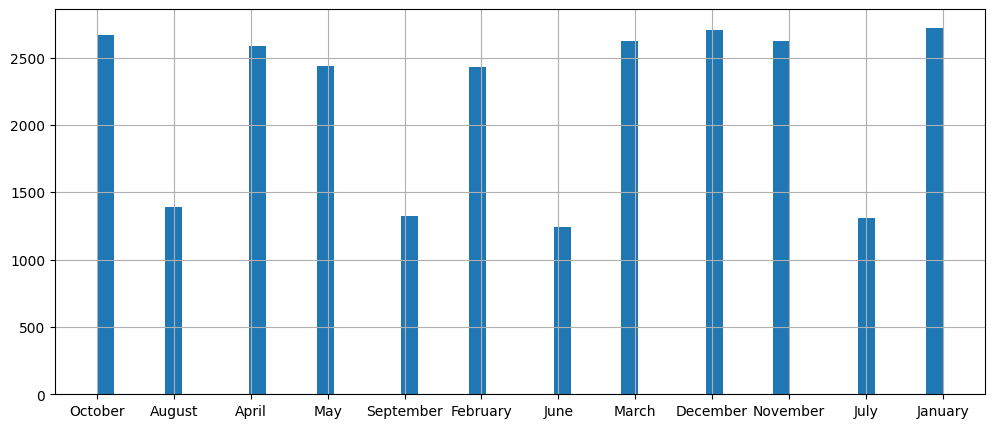

In [89]:
'''  Seeinf Expense made  MOnth-Wise '''

data['Month'].hist(bins  =50 ,  figsize  = (12 , 5))
plt.show()

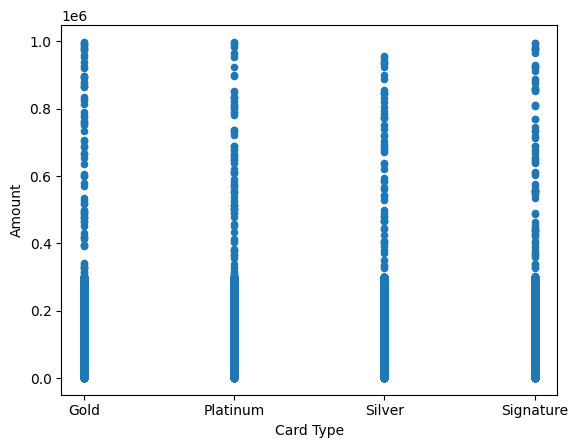

Card Type
Silver       6840
Signature    6447
Platinum     6398
Gold         6367
Name: count, dtype: int64

In [90]:
data.plot( kind  = 'scatter' , x = 'Card Type' , y = 'Amount')

plt.show()

data['Card Type'].value_counts()

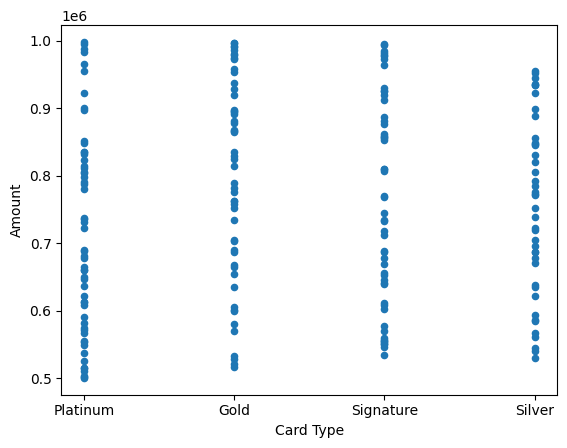

' HIhest Amount of Transactions have been made from the Platinum Card > Gold Card \nInference ->  Platinum Card is More Powerful .\n'

In [91]:
''' More than 5.0 lakh ruppes transaction from the Card Type '''

df2 = data[  data['Amount'] >= 500000]

df2.plot( kind  = 'scatter' , x = 'Card Type' , y = 'Amount')

plt.show()

df2['Card Type'].value_counts()

''' HIhest Amount of Transactions have been made from the Platinum Card > Gold Card 
Inference ->  Platinum Card is More Powerful .
'''


' Inference  -  1 LAkh to 3 Lakhs transactions are highest '

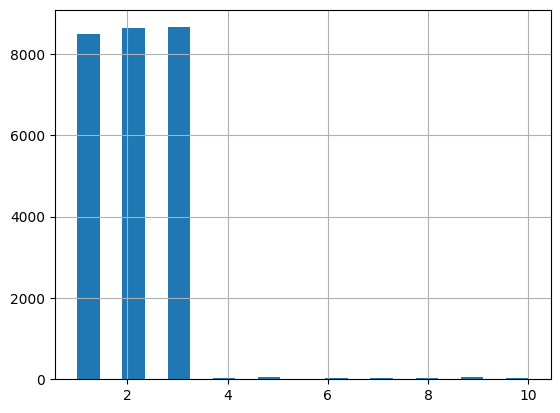

In [92]:
''' Categorise the Amount of Transaction and see Which range amount has been drawn more '''
data1 = data.copy()
data1['Amount'] = pd.cut( data1['Amount'] , bins = [ 0 , 100000 ,  200000 ,  300000 ,  400000 ,  500000 ,  600000 ,  700000 ,  800000 ,  900000 , np.inf] ,
                          labels = [1,2,3,4,5,6,7,8,9,10])
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()
min_max.fit_transform(data1[['Amount']] ) 

data1['Amount'].hist( bins = 20 )

''' Inference  -  1 LAkh to 3 Lakhs transactions are highest '''

In [93]:
''' Dummy data '''
dummy = data.copy() 


In [94]:
# '''  Standarizing the amount Data ( making variance  = 1) and seeing its dsitrbution )( Amount  -> Continuous Random Variable )'''

# from sklearn.preprocessing import StandardScaler 

# std_scale = StandardScaler()

# dummy['Amount']  = std_scale.fit_transform( dummy[['Amount']])


''' DO feature Scaling after splititng the Dataset '''

' DO feature Scaling after splititng the Dataset '

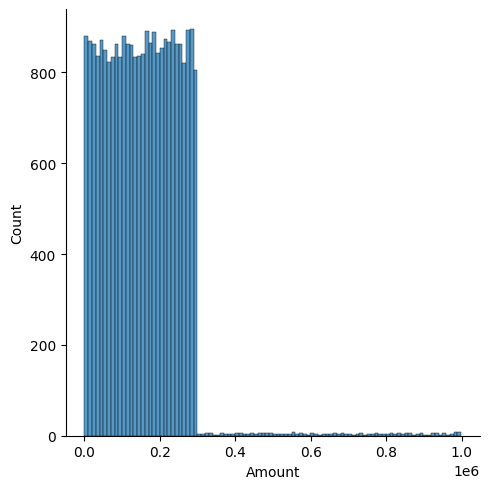

' pdf is higly skewed ( right / positive skewed ) Since people exxpending high Amount of money is usually less in a normal society \nmost are middle class ( mean > median) , so use median to represent data since its least affected by outliers or spread of data  '

In [95]:
''' Visualizing the pdf of Scaled Amount  '''

# dummy['Amount'].hist ( bins  = 100 )
sns.displot( dummy['Amount'] , bins = 100  )
plt.show()

''' pdf is higly skewed ( right / positive skewed ) Since people exxpending high Amount of money is usually less in a normal society 
most are middle class ( mean > median) , so use median to represent data since its least affected by outliers or spread of data  '''

In [96]:
'''  Use Ordinal Encoder to encode Months , since they have rwaaltion b/w them  '''
from sklearn.preprocessing import OrdinalEncoder


def ordinal_encode( col , data , newColName   ) : 
    ord_encode = OrdinalEncoder()
    newCol = ord_encode.fit_transform( data[[ col ]])
    newCols   = pd.DataFrame ( newCol, columns  = [ newColName] )
    data  = pd.concat( [data , newCols ] , axis =1 )
    data = data.drop( col  , axis = 1 )
    return data 

data  = ordinal_encode( 'Month' , data , 'Months' )
data = ordinal_encode('Gender' , data , 'Genders')

# data = ordinal_encode( 'Exp Type' , data  , 'Exp Type')
data.drop( ['Exp Type'] ,axis =1 , inplace=  True  )

In [97]:
'''Doing Onr-Hot-encoding on the cattegorical data ( Card , Gender  )'''

from sklearn.preprocessing import OneHotEncoder 


def one_hot_encode ( col , data ) :
    encoder = OneHotEncoder( sparse = False )
    df1 = encoder.fit_transform( data[[ col ]] )
    encoded_df = pd.DataFrame ( df1 , columns  = encoder.categories_)
    data = pd.concat( [ encoded_df , data ] , axis =1 )
    data.drop( [ col ] , axis =1 , inplace = True )
    return data 


data = one_hot_encode( 'Card Type' , data )
data  = one_hot_encode( 'Cities' , data )



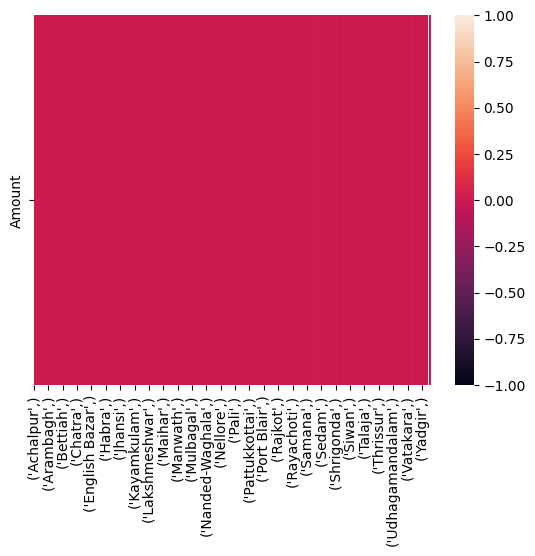

(Achalpur,)     0.003987
(Adilabad,)     0.003904
(Adityapur,)    0.000626
(Adoni,)        0.003360
(Adoor,)       -0.010161
                  ...   
(Silver,)      -0.000204
Amount          1.000000
Year            0.009809
Months         -0.007141
Genders        -0.048928
Name: Amount, Length: 994, dtype: float64


In [98]:
''' To find the Most important feature , we use Correlation Matrix 
and find correaltion of Amount( target var) wrt each column 
'''

corr = data.corr()

sns.heatmap( corr[['Amount']].transpose()  , vmin = -1 , vmax =1 )

plt.show()

print( corr['Amount'])

In [99]:
'''  Train Test split on the dataset and make sure the test dataset has NO sampling bias ( use Stratified Sampling Technique )
     Target Variable -  Amount 

     and Based on Correaltion matrix , most important features are  -  BIlls and Gender 
     But by intutuin , I think Months , BIlls and Gender are good features to ccorealte column of Amount with 
     hence , 
     Most Important Feature I selected -  Months ( earlier I selected Gender bby intution)

     But by Using feature importance of Random Forest and intutuion selected Months 

     Now , we split the data based on 'Months ' and this column is almost balanced 

'''

''' No nned to categorise since Gender is ALREADY a catgorical column '''
'''   Just split the data based on data variation in 'Months' Column  ( hence , NO SAMPLING BIAS )'''

from sklearn.model_selection import StratifiedShuffleSplit  # returs the train and test index based on actual variations 

''' splis =1 ( since ONLY train and  test data )' and generate same train and test indexes everytime ( random_state  = 42 )
and use .loc to pick those returned indices 
'''


a = StratifiedShuffleSplit ( n_splits =1  , test_size = 0.1 , random_state= 42 )

for train_index , test_index  in a.split( data , data['Months']) :
    strat_train_set = data.loc[ train_index ] 
    strat_test_set = data.loc[ test_index]
    


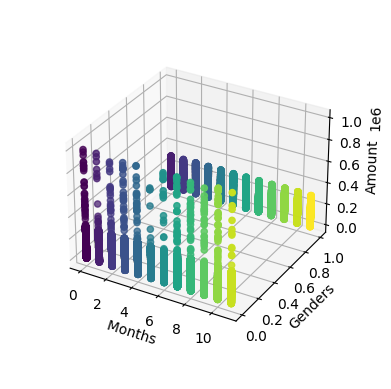

In [100]:
''' Set axes system to 3D '''
ax= plt.axes( projection = '3d')

''' Specify the quantiy on X , Y , Z axes '''

x = data['Months'] 
y = data['Genders']
z = data['Amount']

''' c =x + y changes color theme . Why ?  '''
ax.scatter( x , y , z , c =x + y  )

ax.set_xlabel('Months ')
ax.set_ylabel('Genders')
ax.set_zlabel('Amount')

''' Zoomed out to see Z label '''
ax.set_box_aspect(aspect=None, zoom=0.8)

''' Gender 0 : Female    AND 1: MAle -> Females spent a lot more Money '''

plt.show()

'  Large Number of outliers in Transaction amount but less than novelties ( normal data )\n\n   But removing them is NOT a good choice here as they might indicate abnormal transactions ( might also help in fraud detection parallely)\n   or some transaction for unique part of population \n   \n'

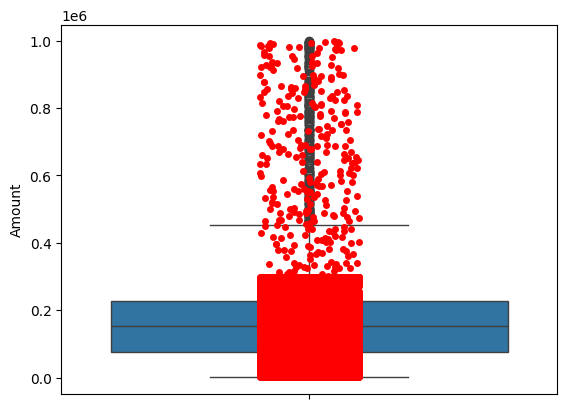

In [101]:
''' FInding if there are outliers in the Amount column '''

sns.boxplot( data['Amount'])
sns.stripplot( data['Amount'] , color  = "red" )

'''  Large Number of outliers in Transaction amount but less than novelties ( normal data )

   But removing them is NOT a good choice here as they might indicate abnormal transactions ( might also help in fraud detection parallely)
   or some transaction for unique part of population 
   
'''



In [102]:
# ist Quantile 
q1 = data['Amount'].quantile( 0.25 )
#3  quantile 
q3 = data['Amount'].quantile( 0.75 )

iqr = q3 - q1  

low_lim = q1 - 1.75* iqr 
upp_lim = q3 + 1.75*iqr 


''' Removing Outliers in data   ( OPTIONAL - more experimentation ) '''

data_out = data [ data['Amount'] <= upp_lim ]
# Sucne , outlier after upper bound 
#data_out = data_out [ data['Amount'] >= low_lim ]
''' Data_out - Without Outlier DF
    Data = With Outlier DF 
'''


' Data_out - Without Outlier DF\n    Data = With Outlier DF \n'

In [103]:
data.shape

(26052, 994)

In [104]:
''' The Amount column has large varations in the data '''

' The Amount column has large varations in the data '

In [105]:
data.head()

,"(Achalpur,)","(Adilabad,)","(Adityapur,)","(Adoni,)","(Adoor,)","(Afzalpur,)","(Agartala,)","(Agra,)","(Ahmedabad,)","(Ahmednagar,)",...,"(Zirakpur,)","(Zunheboto,)","(Gold,)","(Platinum,)","(Signature,)","(Silver,)",Amount,Year,Months,Genders
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,82475.0,2014.0,10.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,32555.0,2014.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,101738.0,2014.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,123424.0,2014.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,171574.0,2015.0,8.0,0.0


In [ ]:
''' SINce , ONe Hot encoded Cities Vector was very sparse and too large , SO , losing them meant also losing a lot 
of useful demographic Info , Hence , performed KMeans CLustering to give a LAbel( with high importance of Columns of Cities )
and assigned LAbesl based on the Citiies . 
'''

from sklearn.cluster import KMeans 

kmeans = KMeans( n_clusters = 10 )

data.columns  = data.columns.astype(str )

kmeans.fit( data )

data['City']  = kmeans.labels_

data = data.iloc[ : , 986: ]
data.head()

In [106]:
''' Features and labels Sepration '''


X_train , y_train = strat_train_set.drop( ['Amount'] , axis =1 ) , strat_train_set['Amount']

X_test , y_test= strat_test_set.drop( ['Amount'] , axis =1 ) , strat_test_set['Amount']

In [107]:
data_out.shape

(25843, 994)

In [108]:
''' Features and labels Sepration - BAsed on Data with no Outliers  '''

b = StratifiedShuffleSplit ( n_splits =1  , test_size = 0.2 , random_state= 42 )

for train_index , test_index  in b.split( data_out , data_out['Months']) :
    strat_train_set = data_out.iloc[ train_index ] 
    strat_test_set = data_out.iloc[ test_index]
    

X_train_out , y_train_out = strat_train_set.drop( ['Amount'] , axis =1 ) , strat_train_set['Amount']

X_test_out , y_test_out = strat_test_set.drop( ['Amount'] , axis =1 ) , strat_test_set['Amount']

In [109]:
''' COnverting all column NAMES to string '''

X_train.columns  = X_train.columns.astype(str)

X_test.columns  = X_test.columns.astype(str)

X_train_out.columns  = X_train_out.columns.astype(str)

X_test_out.columns  = X_test_out .columns.astype(str)


In [110]:
'''  Now making some assumptions about the data and choosing the ML model '''

from sklearn.ensemble import RandomForestRegressor 

forest_reg = RandomForestRegressor( n_estimators = 100 , bootstrap = True   )

forest_reg.fit( X_train , y_train )

''' bootstrap = False , the whole data is sued to build Decison tree othwrwise , uses sampling with repalcement 

 '''

' bootstrap = False , the whole data is sued to build Decison tree othwrwise , uses sampling with repalcement \n\n '

In [111]:
''' Seeing the most important features '''
imp = forest_reg.feature_importances_
col = X_train.columns

for i in range( len(col) ) :
    print(col[i] , " " , imp[i])

''' Most IMportant feature is  - Months '''


('Achalpur',)   0.0002246993858653405
('Adilabad',)   0.0006421814999101911
('Adityapur',)   0.0004053855508085866
('Adoni',)   0.000636938963595187
('Adoor',)   0.0009333117746039041
('Afzalpur',)   0.0008307185375192487
('Agartala',)   0.0007302243791860438
('Agra',)   3.215396880214924e-05
('Ahmedabad',)   0.010223333649392026
('Ahmednagar',)   0.00015762267635341376
('Aizawl',)   0.0003217186161912239
('Ajmer',)   0.000508714840611629
('Akola',)   0.001119540563177108
('Akot',)   0.0009245701815966945
('Alappuzha',)   0.0006787418465560564
('Aligarh',)   0.00044503133100246386
('Alipurduar',)   0.000260867827339083
('Alirajpur',)   0.0
('Allahabad',)   0.00043339697652344496
('Alwar',)   0.0004824303753382539
('Amalapuram',)   0.00031016840303105795
('Amalner',)   0.00038139164221383747
('Ambejogai',)   0.0006748212267542121
('Ambikapur',)   0.0007199238159087024
('Amravati',)   0.0005855341223094121
('Amreli',)   0.0004405937194785467
('Amritsar',)   0.0004350120685857705
('Amroha

' Most IMportant feature is  - Months '

In [112]:
''' Find training error - MSE (y , y_hat) '''

y_train_rand = forest_reg.predict( X_train )

from sklearn.metrics import mean_squared_error

error = mean_squared_error( y_train , y_train_rand)
error = np.sqrt( error )

print( f" the RMSE training error for Rand FOrest is {error }")



 the RMSE training error for Rand FOrest is 91786.39068615848


In [113]:
# ''' Find ANother form of trainig error , cross validation score '''
# from sklearn.model_selection import cross_val_score

# score = cross_val_score( forest_reg , X_train , y_train , cv = 5  , scoring = "neg_mean_squared_error" )

# print(score)

# print( f" The average of these Negative mean squared error in cross validation is {score.mean()}")
# ''' nearer to 0 ( negative MSE ) is good '''


In [114]:
''' Doing prediction on Test Data '''

y_test_rand = forest_reg.predict( X_test)

''' Testing error '''

test_error = np.sqrt(mean_squared_error( y_test , y_test_rand ) )

print(f" THe testing error(RMSE) for Random Forest Regressor model(before fine tuning) is = {test_error} ")


from sklearn.metrics import r2_score

print( r2_score ( y_test , y_test_rand ))




 THe testing error(RMSE) for Random Forest Regressor model(before fine tuning) is = 106891.17497580533 
-0.07458336798670162


In [115]:
# ''' Fine tune the Model '''

# ''' THe ONly hyper param I am concerned about  - No of decision trees in Random Forest , SO use Grid Search > Randomized Sarch '''

# from sklearn.model_selection import GridSearchCV 

# params = [ { "n_estimators" : [ 500 , 1000 ]} , { "n_estimators" : [ 100 , 200 , 300 ]  , "bootstrap " : [False]} ] 

# grid_search = GridSearchCV( forest_reg , params , cv = 5 )

# grid_search.fit( X_train , y_train)

In [117]:
# '''  Drawing the Learnign Curve of Model - showing Training error and Validation error as a function of increasing dataset size '''

# from sklearn.model_selection import train_test_split

# X_t ,X_val , y_t, y_val = train_test_split( X_train[:100] , y_train[:100] , test_size=0.2 )


# train_error =[]
# val_error = []

# for i in range(1 ,  len(X_t)) :
#     X1 = X_t[:i]
#     y1 = y_t[:i]
#     forest_reg.fit(X1 , y1 )
#     y_t_pred = forest_reg.predict(X1)

#     y_val_pred = forest_reg.predict(X_val)
    
#     # validation set iss ame but as the model learns more , the validation score changes 
#     train_error.append( np.sqrt(mean_squared_error(y1 , y_t_pred)) )
#     val_error.append( np.sqrt(mean_squared_error(y_val , y_val_pred)))

# plt.plot ( range(1 , len(X_t)) , train_error , "r--" , label = "Training_error ")
# plt.plot( range( 1 , len(X_t)) , val_error , "b--" , label = "Validation_error")
# plt.show()

# ''' Model is highly underfitting , so MAybe , MAny outliers in data  '''
# ''' After removing outliers , high improvement ( but model is highly overfitting now )'''




In [118]:
from sklearn.linear_model import SGDRegressor 

''' Elastic Net -  weighted sum of Ridge and LAsso regularization to prevent Overfitting'''
sgd = SGDRegressor( penalty = "elasticnet" , l1_ratio= 0.5 )
sgd.fit( X_train, y_train)


SGDRegressor(l1_ratio=0.5, penalty='elasticnet')

In [119]:
''' RMSE training error'''
y_train_elas = sgd.predict( X_train )

score_elas  = np.sqrt(mean_squared_error( y_train , y_train_elas) )

print( f" The trainin error RMSE for ElasticNet regularzied Linear Model  -{score_elas}")

 The trainin error RMSE for ElasticNet regularzied Linear Model  -98681526706422.31


In [ ]:
# ''' Find ANother form of trainig error , cross validation score '''


# score = cross_val_score( sgd , X_train , y_train , cv = 5  , scoring = "neg_mean_squared_error" )

# print(score)

# print( f" The average of these Negative mean squared error in cross validation is {score.mean()}")
# ''' nearer to 0 ( negative MSE ) is good '''


In [120]:
y_hat_elas = sgd.predict(X_test)

''' Testing error '''

test_error = np.sqrt(mean_squared_error( y_test, y_hat_elas ) )

print(f" THe testing error(RMSE) for SGDRegressor with ElasticNet Regularization term added  model(before fine tuning) is = {test_error} ")


'''  From R2 Score , we infer - SGD Regression  Model '''
print( r2_score ( y_test, y_hat_elas ))



 THe testing error(RMSE) for SGDRegressor with ElasticNet Regularization term added  model(before fine tuning) is = 98679297870540.27 
-9.158166055980783e+17


In [ ]:
# '''  Drawing the Learnign Curve of Model - showing Training error and Validation error as a function of increasing dataset size '''



# X_t ,X_val , y_t, y_val = train_test_split( X_train[:100] , y_train[:100] , test_size=0.2 )


# train_error =[]
# val_error = []

# for i in range(1 ,  len(X_t)) :
#     X1 = X_t[:i]
#     y1 = y_t[:i]
#     sgd.fit(X1 , y1 )
#     y_t_pred = sgd.predict(X1)

#     y_val_pred = sgd.predict(X_val)
    
#     # validation set issame but as the model learns more , the validation score changes 
#     train_error.append( np.sqrt(mean_squared_error(y1 , y_t_pred)) )
#     val_error.append( np.sqrt(mean_squared_error(y_val , y_val_pred)))

# plt.plot ( range(1 , len(X_t)) , train_error , "r--" , label = "Training_error ")
# plt.plot( range( 1 , len(X_t)) , val_error , "b--" , label = "Validation_error")
# plt.show()

# ''' Highly Overfitting - Without removing the dataset '''

In [121]:
from sklearn.svm import SVR

# fit a NOn Linear Regression model on data
''' Radial Basis FUnction Kernel '''

svr_rbf = SVR(  kernel="rbf" )
# do wide margin regression 
svr_rbf.fit( X_train , y_train)

SVR()

In [122]:
''' RMSE training error'''
y_train_rbf = svr_rbf.predict( X_train )

score_rbf  = np.sqrt(mean_squared_error( y_train  , y_train_rbf) )

print( f" The trainin error RMSE for SVR  with simialrity function of RBF Model  -{score_rbf}")

 The trainin error RMSE for SVR  with simialrity function of RBF Model  -103099.0761218269


In [123]:
y_pred_rbf = svr_rbf.predict( X_test )

''' Testing error '''

test_error_rbf = mean_squared_error( y_test , y_pred_rbf )

print(f" THe testing error(MSE) for SVR RBF for non linear regresion (before fine tuning) is = {test_error_rbf} ")

score = r2_score( y_test , y_pred_rbf)

print( f" R2 score for  SVM Non Linear Regressor is {score}")



 THe testing error(MSE) for SVR RBF for non linear regresion (before fine tuning) is = 10632717236.077177 
 R2 score for  SVM Non Linear Regressor is -1.5588234887342622e-06


In [ ]:
# # fit a NOn Linear Regression model on data
# ''' Poly Kernel '''

# svr_poly = SVR(  kernel="poly" )

# svr_poly.fit( X_train , y_train)

In [ ]:
# ''' Linear SVM , ( fitting amargin , wide street Find ANother form of trainig error , cross validation score '''


# score = cross_val_score( Lin_svm , X_train , y_train , cv = 5  , scoring = "neg_mean_squared_error" )

# print(score)

# print( f" The average of these Negative mean squared error in cross validation is {score.mean()}")
# ''' nearer to 0 ( negative MSE ) is good '''


In [ ]:
# y_pred_svr = svr.predict( X_test )


In [ ]:
# ''' Testing error '''

# test_error = mean_squared_error( y_test , y_pred_svr )

# print(f" THe testing error(MSE) for SVR  model(before fine tuning) is = {test_error} ")

# ''' Inference , testing error too high ( Very Wrong Predictions )'''

In [ ]:
# score = r2_score( y_test , y_pred_svm)

# print( f" R2 score for linear SVM Regressor is {score}")
# '''  Alittle Better'''

In [124]:
''' Making Ensemble of HYperparam Tuned Model '''

def transaction_predictor( x , weight_1 , weight_2 , weight_3 ): # weights of model 
    # x - feature instance 
    pred1 =  weight_1 * forest_reg.predict( x)
    pred2 =  weight_2 * sgd.predict( x)
    pred3 =  weight_3 *svr_rbf.predict( x)

    return (pred1+pred2+pred3)/3


In [125]:
y_t = transaction_predictor( X_test , 0.2 , 0.5 , 0.3 )

r2_score( y_test , y_t )

-2.543935046965736e+16

In [126]:
''' OUtlier specifiv models '''

' Pickling the Model and Running the Streamlit function '

In [127]:
''' Training NEw Variations of these 3 ML models on outlier removed dataset '''


forest_reg_out = RandomForestRegressor( n_estimators = 100 , bootstrap = True   )

forest_reg_out.fit( X_train_out , y_train_out )


RandomForestRegressor()

In [137]:
''' Doing prediction on Test Data '''

y_test_rand_out = forest_reg_out.predict( X_test_out )

''' Testing error '''

test_error = np.sqrt(mean_squared_error( y_test_out , y_test_rand_out ) )

print(f" No outlier ,THe testing error(RMSE) for Random Forest Regressor model(before fine tuning) is = {test_error} ")


print( r2_score ( y_test_out  , y_test_rand_out ))




 No outlier ,THe testing error(RMSE) for Random Forest Regressor model(before fine tuning) is = 91848.83353330081 
-0.1099201147057931


In [130]:
sgd_out = SGDRegressor( penalty = "elasticnet" , l1_ratio= 0.5 )
sgd_out.fit( X_train_out, y_train_out )


SGDRegressor(l1_ratio=0.5, penalty='elasticnet')

In [135]:
y_hat_elas_out = sgd_out.predict(X_test_out)

''' Testing error '''

test_error = np.sqrt(mean_squared_error( y_test_out, y_hat_elas_out ) )

print(f" THe testing error(RMSE) for SGDRegressor with ElasticNet Regularization term added  model(before fine tuning) is = {test_error} ")


'''  From R2 Score , we infer - SGD Regression  Model '''
print( r2_score ( y_test_out, y_hat_elas_out ))



 THe testing error(RMSE) for SGDRegressor with ElasticNet Regularization term added  model(before fine tuning) is = 138248300783678.48 
-2.514571771030604e+18


In [132]:
svr_rbf_out = SVR(  kernel="rbf" )

svr_rbf_out.fit( X_train_out  , y_train_out )

SVR()

In [136]:
y_pred_rbf_out = svr_rbf.predict( X_test_out )

''' Testing error '''

test_error_rbf = mean_squared_error( y_test_out , y_pred_rbf_out )

print(f" THe testing error(MSE) for SVR RBF for non linear regresion (before fine tuning) is = {test_error_rbf} ")

score = r2_score( y_test_out , y_pred_rbf_out)

print( f" R2 score for  SVM Non Linear Regressor is {score}")



 THe testing error(MSE) for SVR RBF for non linear regresion (before fine tuning) is = 7607332661.095556 
 R2 score for  SVM Non Linear Regressor is -0.0008680817481128145


In [138]:
''' Making Ensemble of HYperparam Tuned Model '''

def transaction_predictor( x , weight_1 , weight_2 , weight_3 ): # weights of model 
    # x - feature instance 
    pred1 =  weight_1 * forest_reg_out.predict( x)
    pred2 =  weight_2 * sgd_out.predict( x)
    pred3 =  weight_3 *svr_rbf_out.predict( x)

    return (pred1+pred2+pred3)


y_t = transaction_predictor( X_test_out , 0.2 , 0.5 , 0.3 )

r2_score( y_test_out , y_t )

-6.286429427680643e+17

In [139]:
''' Pickling the Model and Running the Streamlit function '''

with open('forest_reg.pkl', 'wb') as file:
    pickle.dump(forest_reg_out , file)



In [140]:
import streamlit as st 
!streamlit run test.py 

^C


In [ ]:
data.to_csv('daily.csv')  # For Tiem Series Forecasting 